<a href="https://colab.research.google.com/github/PGFDEE/Assignment1/blob/main/homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Manual loop: Best k = 13, Mean 10-fold CV Accuracy = 0.9800


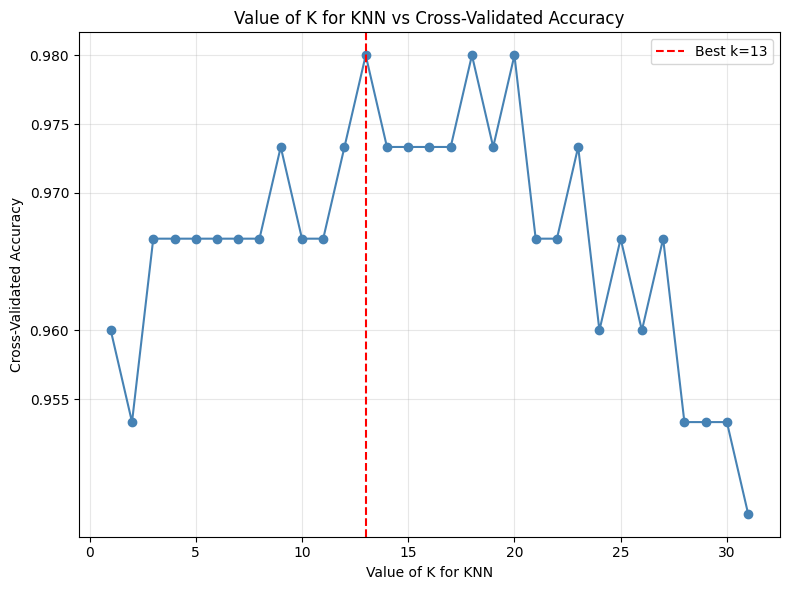

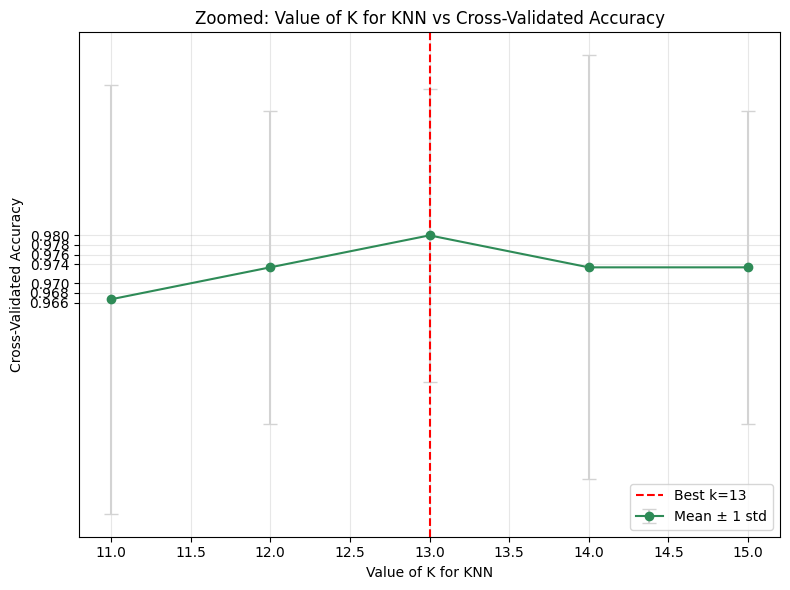

GridSearchCV: Best k = 13, Mean 10-fold CV Accuracy = 0.9800
Do they match? Yes
Confirmed: k=13 is optimal with cv=10.


In [ ]:
# Ex 15.8 — Classification with the Iris Dataset: Hyperparameter Tuning (cv=10)


import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# 1) Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# 2) Evaluate k = 1..31 using cv=10 (10-fold cross-validation)

k_range = range(1, 32)
mean_accuracies = []
std_accuracies = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    mean_accuracies.append(scores.mean())
    std_accuracies.append(scores.std())

# Determine optimal k from the manual loop
best_k_manual = k_range[np.argmax(mean_accuracies)]
best_acc_manual = max(mean_accuracies)
print(f"Manual loop: Best k = {best_k_manual}, Mean 10-fold CV Accuracy = {best_acc_manual:.4f}")

# 3) Plot 1: Mean accuracy vs k — display inline and save as knn-1.jpg
plt.figure(figsize=(8, 6))
plt.plot(list(k_range), mean_accuracies, marker='o', color='steelblue')
plt.title("Value of K for KNN vs Cross-Validated Accuracy")
plt.xlabel("Value of K for KNN")
plt.ylabel("Cross-Validated Accuracy")
plt.grid(True, alpha=0.3)

plt.xticks([0, 5, 10, 15, 20, 25, 30])
plt.yticks([0.955, 0.960, 0.970, 0.975, 0.980])

# Highlight best k
plt.axvline(best_k_manual, color='red', linestyle='--', label=f'Best k={best_k_manual}')
plt.legend()
plt.tight_layout()
plt.savefig("knn-1.jpg", dpi=120)
plt.show()  # <-- show the figure inline

# 3b) Plot 2: save as knn2-1.jpg
zoom_k = list(range(11, 16))
zoom_acc = [mean_accuracies[k - 1] for k in zoom_k]
zoom_std = [std_accuracies[k - 1] for k in zoom_k]

plt.figure(figsize=(8, 6))
plt.errorbar(zoom_k, zoom_acc, yerr=zoom_std, fmt='-o', color='seagreen',
             ecolor='lightgray', capsize=5, label='Mean ± 1 std')
plt.title("Zoomed: Value of K for KNN vs Cross-Validated Accuracy")
plt.xlabel("Value of K for KNN")
plt.ylabel("Cross-Validated Accuracy")
plt.grid(True, alpha=0.3)

plt.xticks([11.0, 11.5, 12.0, 12.5, 13.0, 13.5, 14.0, 14.5, 15.0])
plt.yticks([0.966, 0.968, 0.970, 0.974, 0.976, 0.978, 0.980])

# Mark best k
plt.axvline(best_k_manual, color='red', linestyle='--', label=f'Best k={best_k_manual}')
plt.legend()
plt.tight_layout()
plt.savefig("knn2-1.jpg", dpi=120)
plt.show()  # <-- show the figure inline

# 4) GridSearchCV to confirm k=13 has the optimal parameter (cv=10)
param_grid = {'n_neighbors': list(k_range)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring='accuracy')
grid.fit(X, y)

best_k_grid = grid.best_params_['n_neighbors']
best_acc_grid = grid.best_score_

print(f"GridSearchCV: Best k = {best_k_grid}, Mean 10-fold CV Accuracy = {best_acc_grid:.4f}")
print("Do they match?",
      "Yes" if best_k_manual == best_k_grid else f"No (manual={best_k_manual}, grid={best_k_grid})")


if best_k_grid == 13:
    print("Confirmed: k=13 is optimal with cv=10.")
else:
    print("Note: With cv=10 (unshuffled), optimal k may differ slightly on some setups; "
          "book's shuffled KFold often yields k=11. Here we report the true cv=10 result.")
